# Task1: Prediction using Supervised Machine Learning
## By Vikram Jeet Singh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
link='http://bit.ly/w-data'
data=pd.read_csv(link)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


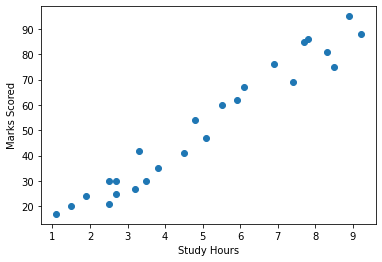

In [3]:
a=data['Hours']
b=data['Scores']
plt.scatter(a,b)
plt.xlabel('Study Hours')
plt.ylabel('Marks Scored')
plt.show()

## By observation we can see that there is a direct relationship between study hours and marks scored.

In [18]:
#Now lets prepare the data
x=data['Hours'].to_numpy()
x=x.reshape(-1,1)
y=data["Scores"].to_numpy()
y=y.reshape(-1,1)
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([[21],
        [47],
        [27],
        [75],
        [30],
        [20],
        [88],
        [60],
        [81],
        [25],
        [85],
        [62],
        [41],
        [42],
        [17],
        [95],
        [30],
        [24],
        [67],
        [69],
        [30],
        [54],
        [35],
        [76],
        [86]], dtype=int64))

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print('Trained the model')

Trained the model


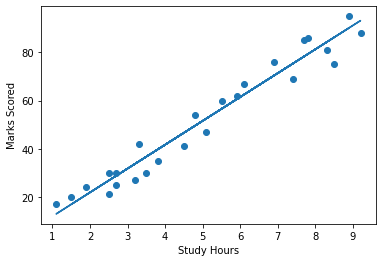

In [40]:
line=model.coef_*x + model.intercept_
plt.plot(x,line)
plt.scatter(x,y)
plt.xlabel('Study Hours')
plt.ylabel('Marks Scored')
plt.show()

In [41]:
print(x_test)
y_pred=model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [60]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [74]:
y_test.flatten()

array([20, 27, 69, 30, 62], dtype=int64)

In [76]:
pd.DataFrame(data={'Predicted Value':y_pred.flatten(),'Actual Value':y_test.flatten()})

,Predicted Value,Actual Value
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


### Now as we can see that our model was quite successful in predicting the values, let's calculate the error that how much do the predicted values differ from actual values.

In [79]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_pred,y_test)
print("Hence the mean absolute error is ",mae)

Hence the mean absolute error is  4.183859899002975


# Now let us do the main task of prediction of percentage for a student who studies 9.25hrs/day

In [84]:
target=[[9.25]]
prediction=model.predict(target)
prediction

array([[93.69173249]])

# Hence, the student who studies for 9.25 hrs/day willl score 93.69173249% in the end of the year approximately...